In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
power = pd.read_csv('linearregression.csv')

In [3]:
power.head()

,r,Theta,e,fp,B,Sp,C_flow,N_islands,N_fail,CC_fail,CLS
0,0.5,0.10,0.20,0.02,0.2,6,216.3,8,28,1400,106
1,0.5,0.15,0.10,0.02,0.4,2,55.5,4,22,1700,37
2,0.9,0.10,0.05,0.01,0.1,5,107.5,1,2,160,238
3,0.9,0.25,0.10,0.01,0.3,7,393.5,2,4,680,228
4,0.9,0.05,0.05,0.03,0.2,4,78.9,1,3,180,238


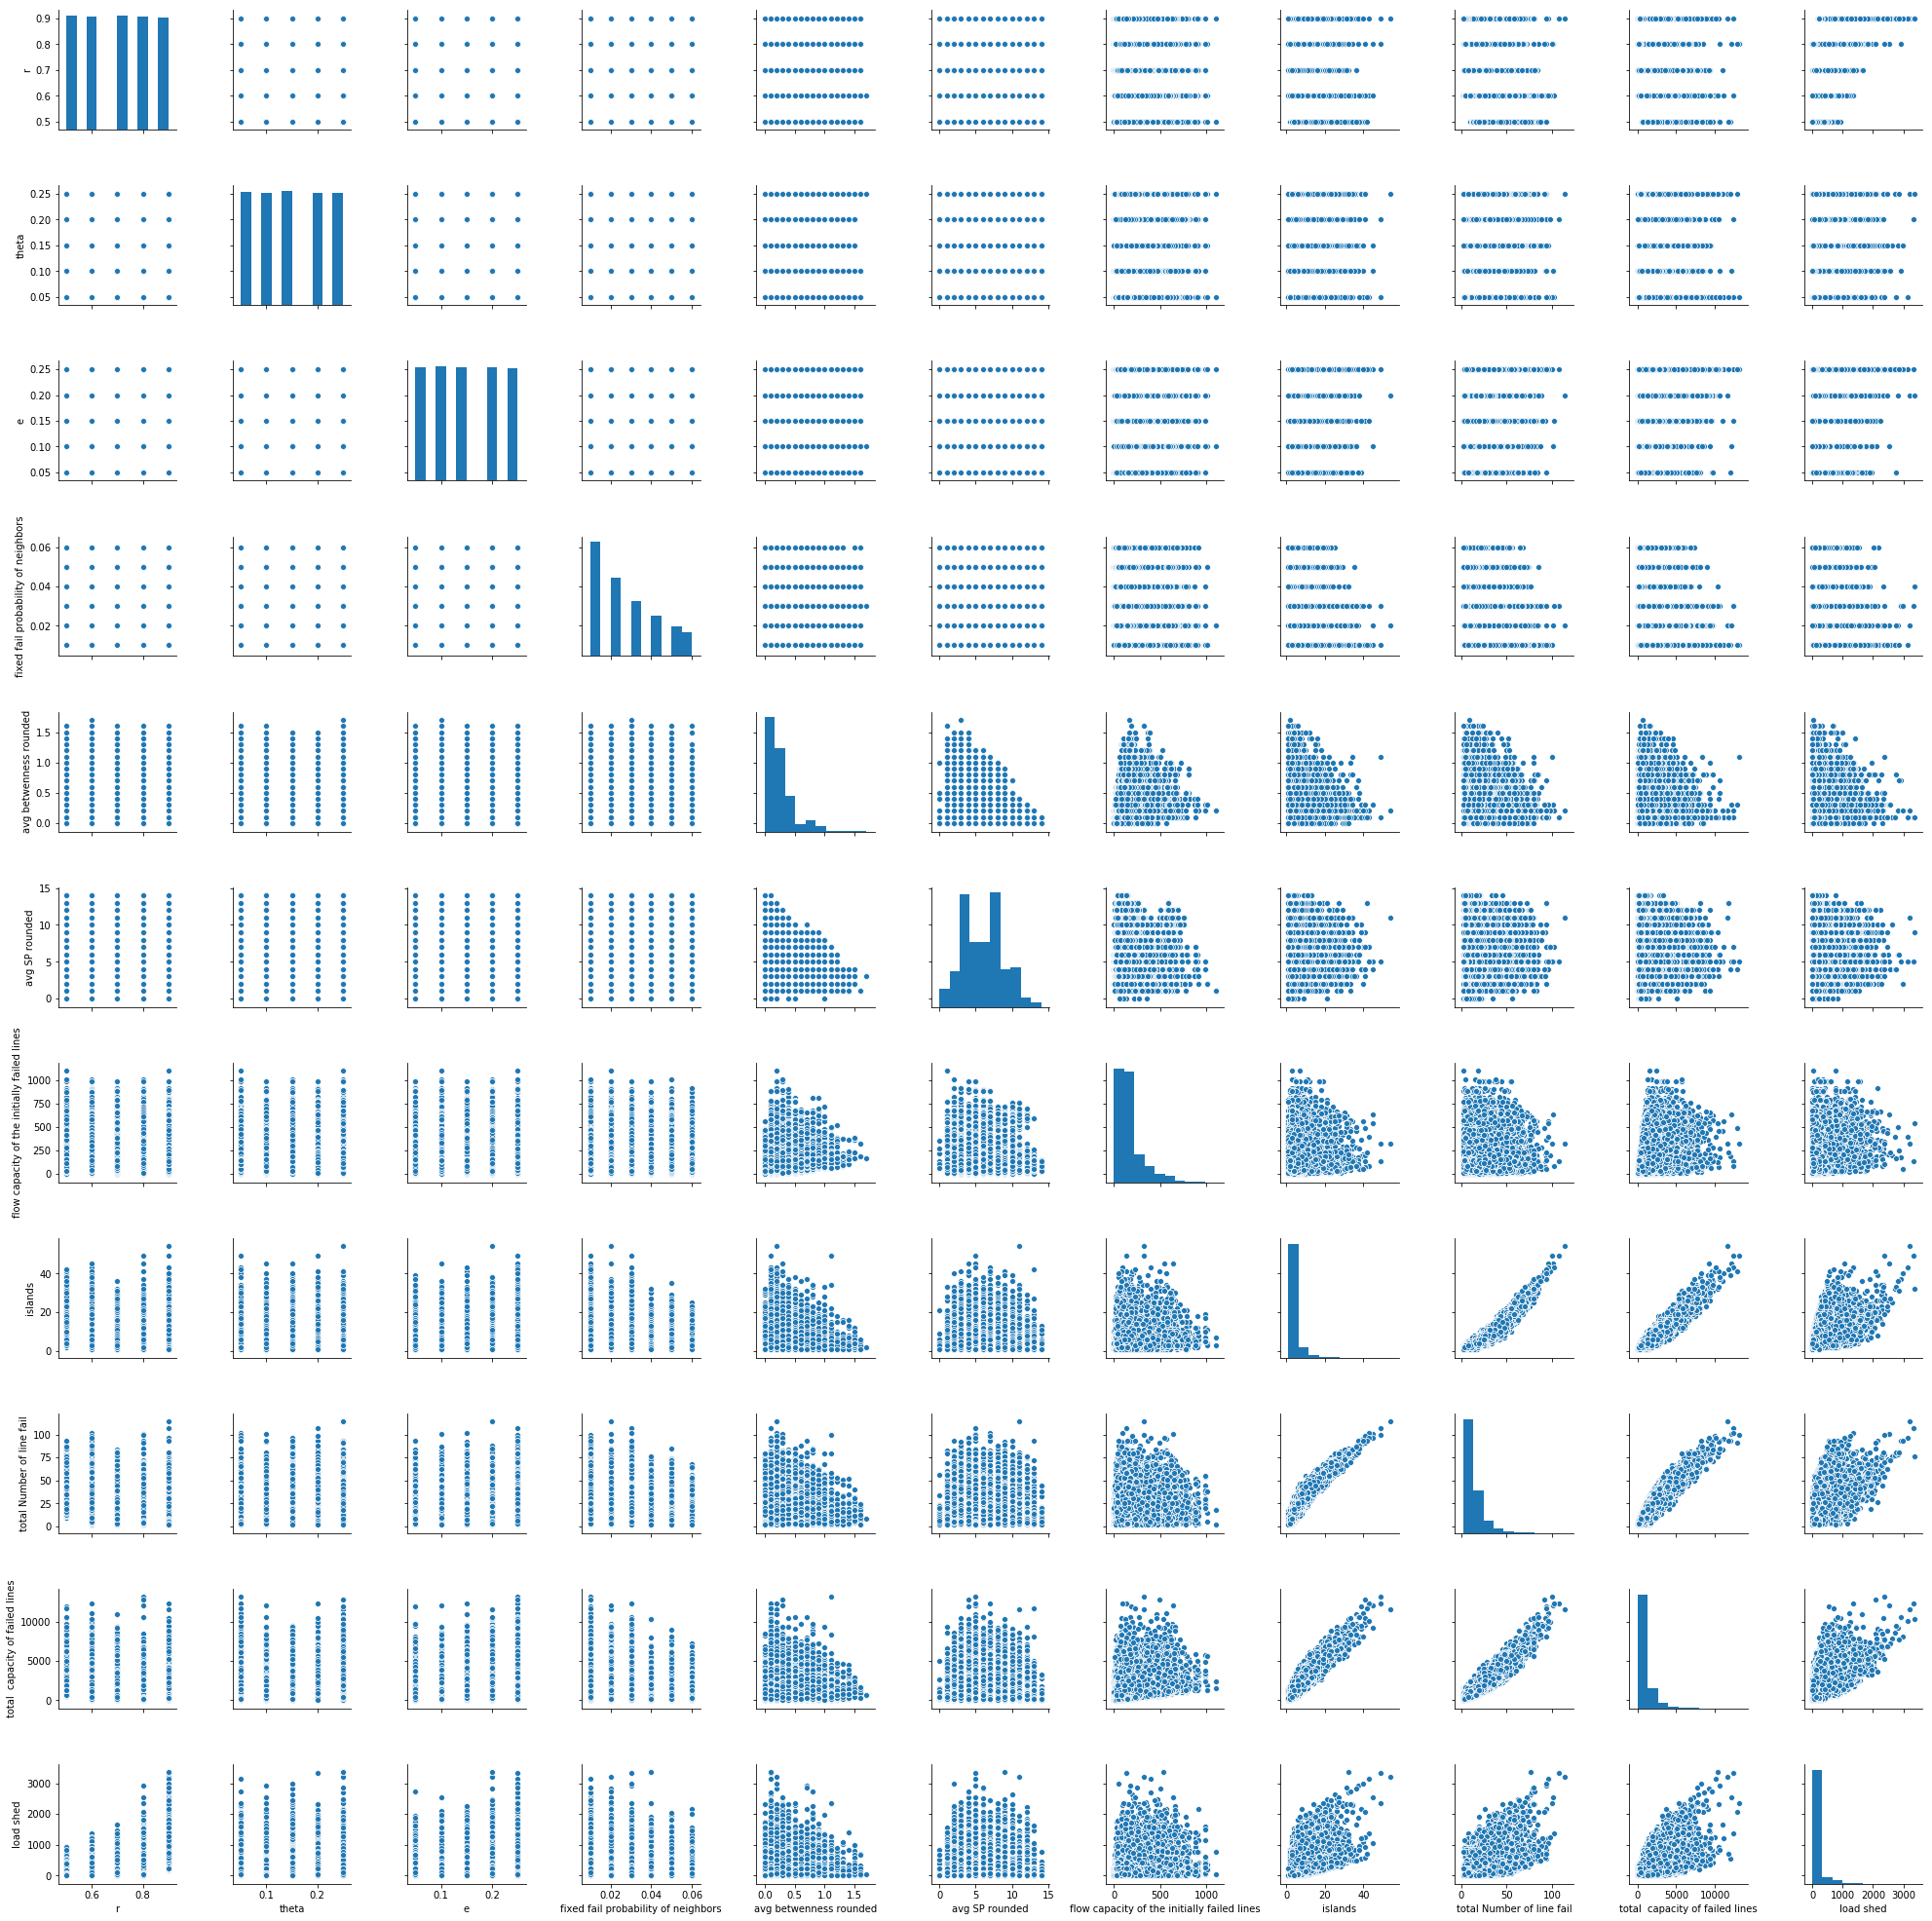

In [5]:
#pairwise correlation plot

sns.pairplot(power)

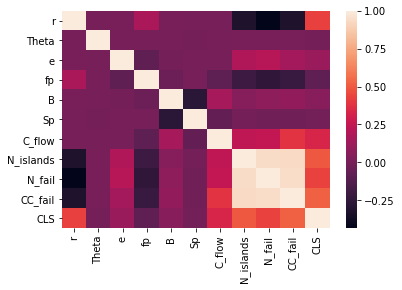

In [75]:
# heatmap

heat = sns.heatmap(power.corr(),annot=False)

In [76]:
fig = heat.get_figure()
fig.savefig('correlation', format='eps', dpi=300)


In [72]:
power.corr()

,r,theta,e,fixed fail probability of neighbors,avg betwenness rounded,avg SP rounded,flow capacity of the initially failed lines,islands,total Number of line fail,total capacity of failed lines,load shed
r,1.000000,0.001446,0.004721,0.166374,0.003615,0.001457,0.001695,-0.316999,-0.434028,-0.319352,0.431997
theta,0.001446,1.000000,0.000283,-0.001458,-0.001420,-0.002978,-0.001250,0.006853,0.006651,0.007071,-0.007685
e,0.004721,0.000283,1.000000,-0.075583,-0.003931,0.001247,0.002425,0.185014,0.211844,0.148430,0.119183
fixed fail probability of neighbors,0.166374,-0.001458,-0.075583,1.000000,-0.038655,-0.000995,-0.081496,-0.208163,-0.254090,-0.220929,-0.076769
avg betwenness rounded,0.003615,-0.001420,-0.003931,-0.038655,1.000000,-0.271971,0.154655,0.048037,0.077938,0.088974,0.056429
avg SP rounded,0.001457,-0.002978,0.001247,-0.000995,-0.271971,1.000000,-0.065151,-0.004476,-0.016332,-0.020193,-0.010821
flow capacity of the initially failed lines,0.001695,-0.001250,0.002425,-0.081496,0.154655,-0.065151,1.000000,0.241757,0.249965,0.386933,0.336065
islands,-0.316999,0.006853,0.185014,-0.208163,0.048037,-0.004476,0.241757,1.000000,0.938895,0.938302,0.495876
total Number of line fail,-0.434028,0.006651,0.211844,-0.254090,0.077938,-0.016332,0.249965,0.938895,1.000000,0.946889,0.438327
total capacity of failed lines,-0.319352,0.007071,0.148430,-0.220929,0.088974,-0.020193,0.386933,0.938302,0.946889,1.000000,0.519287


In [6]:
power.columns

Index(['r', 'Theta', 'e', 'fp', 'B', 'Sp', 'C_flow', 'N_islands', 'N_fail',
       'CC_fail', 'CLS'],
      dtype='object')

In [62]:
X = power [['r', 'Theta', 'e', 'fp', 'B', 'Sp', 'C_flow', 'N_islands', 'CLS',
       'CC_fail',]]

In [63]:
y =power[['N_fail']]

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [67]:
# linear regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [68]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
print(lm.intercept_)

[12.95106371]


In [70]:
print(lm.coef_)

[[-1.56756732e+01  4.05468154e-01  9.51786192e+00 -1.96142061e+01
   9.64490356e-01 -6.44613224e-03 -7.12889654e-03  9.69776124e-01
   5.02753684e-03  6.51258120e-03]]


In [71]:
y.columns

Index(['N_fail'], dtype='object')

In [72]:
predictions = lm.predict(X_test)

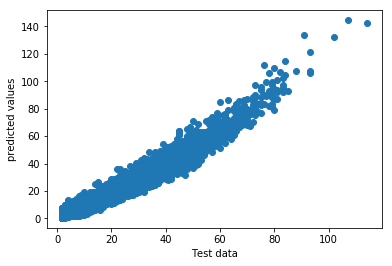

In [73]:
scat= plt.scatter(y_test,predictions)
plt.ylabel('predicted values')
plt.xlabel('Test data')

plt.show()

In [74]:
fig2 = scat.get_figure()
fig2.savefig('numfail', format='eps', dpi=300)


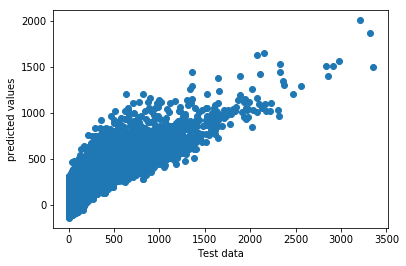

In [59]:
scat= plt.scatter(y_test,predictions)
plt.ylabel('predicted values')
plt.xlabel('Test data')

plt.show()

In [60]:
fig1 = scat.get_figure()
fig1.savefig('cls', format='eps', dpi=300)


C:\Users\6394shuvror\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


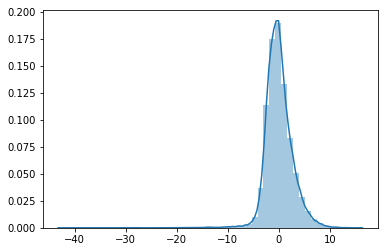

In [79]:
sns.distplot((y_test-predictions),bins=50);

In [84]:
from sklearn import metrics

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82.91747949933894
MSE: 15334.83898991247
RMSE: 123.83391696103483


In [53]:
# ridge regression

from sklearn.linear_model import Ridge

In [54]:
rid = Ridge(alpha=1.0)

In [60]:
rid.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
predictions = rid.predict(X_test)

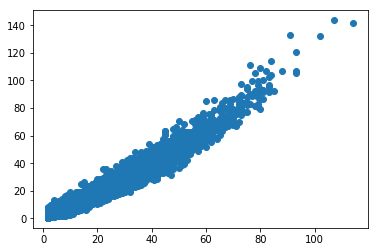

In [62]:
plt.scatter(y_test,predictions)

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.900194529393265
Mean Square Error: 7.06753578411393
Root Mean Square Error: 2.658483737793769
